In [433]:
#Best Library for Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import os

%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 8]
plt.style.use("fivethirtyeight")

import warnings
warnings.simplefilter('ignore')

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, TimeSeriesSplit
from sklearn.metrics import make_scorer, mean_squared_error

# Regression
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor

import xgboost as xgb
import lightgbm as lgb
import catboost as cat

In [434]:
def metric(y,y0):
    assert len(y)==len(y0)
    return 100-np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0),2)))

def metric_lgb(y_pred,data):
    y_true = data.get_label()
    result = metric(y_true,y_pred)
    
    return '100-rmse', result,True

In [435]:
train_1 = pd.read_csv("train.csv")
test_1 = pd.read_csv("test.csv")

# print("Train Shape : {}\nTest Shape: {}\nSub Shape: {}".format(train_1.shape, test_1.shape))

In [436]:
print(f"Train :{train_1.shape} , Test :{test_1.shape}")

Train :(32165, 8) , Test :(10760, 7)


In [437]:
train = train_1.copy()
test = test_1.copy()

In [438]:
train.nunique()

patient_id                    32165
name_of_drug                   2220
use_case_for_drug               636
review_by_patient             30121
effectiveness_rating             10
drug_approved_by_UIC           3537
number_of_times_prescribed      303
base_score                     1383
dtype: int64

In [439]:
train.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [440]:
#Encoding date
def day_date(df,col,drop=True):
    df[col+'_day_']=df[col].dt.day
    df[col+'_month_']=df[col].dt.month
    df[col+'_year_']=df[col].dt.year
    if drop:
        df.drop([col],axis=1,inplace=True)
    return df

In [441]:
train['drug_approved_by_UIC'] = pd.to_datetime(train['drug_approved_by_UIC'])
test['drug_approved_by_UIC'] = pd.to_datetime(test['drug_approved_by_UIC'])
train = day_date(train,'drug_approved_by_UIC',True)
test = day_date(test,'drug_approved_by_UIC',True)

In [442]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
li = ['name_of_drug','use_case_for_drug','review_by_patient']
for i in li:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

## Co Matrix

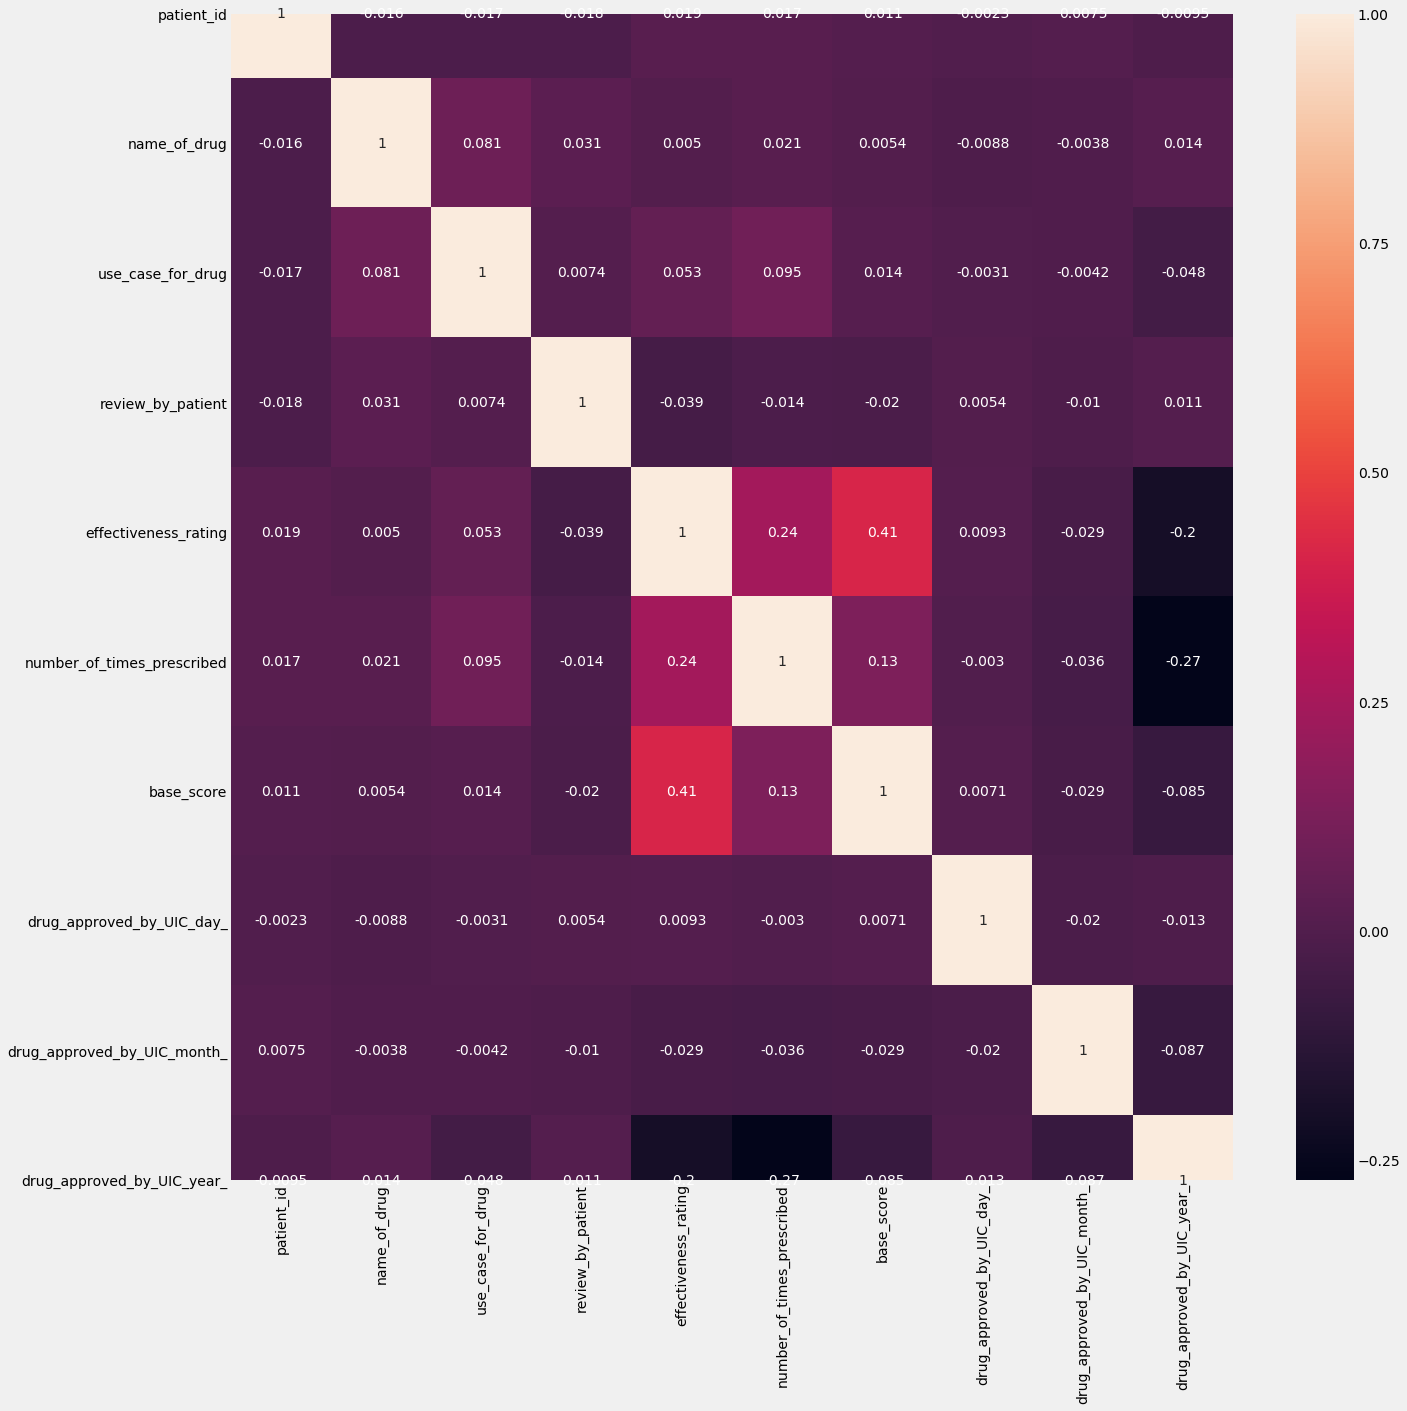

In [443]:
plt.figure(figsize=(20,20))
corr=train.corr()
sns.heatmap(train.corr(),annot=True)

In [444]:
train.columns

Index(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'number_of_times_prescribed', 'base_score',
       'drug_approved_by_UIC_day_', 'drug_approved_by_UIC_month_',
       'drug_approved_by_UIC_year_'],
      dtype='object')

In [445]:
delete = ['review_by_patient','patient_id','drug_approved_by_UIC_month_','drug_approved_by_UIC_year_','drug_approved_by_UIC_day_']
dataset = [train,test]
for x in dataset:
    for i in delete:
        del x[i]

In [446]:
Y= train['base_score']
X = train.drop(['base_score'],axis=1)

In [448]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

## Feature Scaling

In [449]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train = pd.DataFrame(scaler.fit_transform(x_train),columns=X.columns)
# x_test = pd.DataFrame(scaler.fit_transform(x_test),columns=X.columns)

In [450]:
for i in train.columns:
    print(f"{i} : {train[i].nunique()}")

name_of_drug : 2220
use_case_for_drug : 636
effectiveness_rating : 10
number_of_times_prescribed : 303
base_score : 1383


In [451]:
modelxg = RandomForestRegressor(n_estimators=500)

In [452]:
modelxg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [453]:
y_pred = modelxg.predict(x_test)

In [454]:
from sklearn.metrics import mean_squared_error as mse
print(np.sqrt(mse(y_test,y_pred)))

0.2442181478584768


In [455]:
y_pred = modelxg.predict(test)

In [356]:
ans = []

In [357]:
for i in range(len(y_pred)):
    ans.append(round(y_pred[i],2))

In [358]:
sub = test_1['patient_id']

In [359]:
sub = pd.DataFrame(sub)

In [360]:
sub['base_score']=ans

In [361]:
sub.to_csv("submission.csv",index=False)